In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pylab as plt

import math
import sys
import os
import yaml
import numpy as np

import so3g
from so3g.hk.getdata import HKArchiveScanner

In [2]:
cd ../git/so-rox-calibration/bin/

/home/sab267/git/so-rox-calibration/bin


In [3]:
from roxcal.data import trim_data, \
                        cluster_time_and_data_arrays, \
                        extract_temperature_data, \
                        extract_temperature_verification_data

from roxcal.cal import Calibration
from uncertainties_ver_runs import get_sensor_data

In [4]:
temperatures = [0.2, 0.195, 0.19, 0.185, 0.18,
                0.175, 0.17, 0.165, 0.16, 0.155, 0.15, 0.145, 0.14, 0.135,
                0.13, 0.125, 0.12, 0.115, 0.11, 0.105, 0.1, 0.095, 0.09,
                0.085, 0.08, 0.075, 0.07, 0.065, 0.06, 0.055]

In [5]:
temperatures2 = [0.220, 0.2, 0.195, 0.19, 0.185, 0.18,
                0.175, 0.17, 0.165, 0.16, 0.155, 0.15, 0.145, 0.14, 0.135,
                0.13, 0.125, 0.12, 0.115, 0.11, 0.105, 0.1, 0.095, 0.09,
                0.085, 0.08, 0.075, 0.07, 0.065, 0.06]

In [6]:
with open('verification_runs_files.yaml', 'r') as f:
    all_verify_runs = yaml.safe_load(f)

In [7]:
all_verify_data = []
for file in all_verify_runs['files']:
    #print(file)
    data = get_sensor_data(file)
    #print(data)
    all_verify_data.append(data)

In [8]:
len(all_verify_data)

5

In [9]:
lsroxtemps = all_verify_data[0]['CAL']['temp_avg']

In [10]:
x031temps = all_verify_data[0]['X-031']['temp_avg']

In [11]:
x031 = all_verify_data[0]['X-031']['temp_avg']
x032 = all_verify_data[0]['X-032']['temp_avg']
x102 = all_verify_data[0]['X-102']['temp_avg']
x001 = all_verify_data[0]['X-001']['temp_avg']
x111 = all_verify_data[0]['X-111']['temp_avg']
x083 = all_verify_data[1]['X-083']['temp_avg']
x075 = all_verify_data[1]['X-075']['temp_avg']
x035 = all_verify_data[1]['X-035']['temp_avg']
x076 = all_verify_data[1]['X-076']['temp_avg']
x029 = all_verify_data[1]['X-029']['temp_avg']
x090 = all_verify_data[1]['X-090']['temp_avg']
x039 = all_verify_data[1]['X-039']['temp_avg']
x050 = all_verify_data[2]['X-050']['temp_avg']
x021 = all_verify_data[2]['X-021']['temp_avg']
x038 = all_verify_data[2]['X-038']['temp_avg']
x092 = all_verify_data[2]['X-092']['temp_avg']
x026 = all_verify_data[2]['X-026']['temp_avg']
#x001
x057 = all_verify_data[3]['X-057']['temp_avg']
x044 = all_verify_data[3]['X-044']['temp_avg']
x113 = all_verify_data[3]['X-113']['temp_avg']
x097 = all_verify_data[3]['X-097']['temp_avg']
#x001
x068 = all_verify_data[4]['X-068']['temp_avg'] 
x071 = all_verify_data[4]['X-071']['temp_avg']
x079 = all_verify_data[4]['X-079']['temp_avg']
x064 = all_verify_data[4]['X-064']['temp_avg']

roxes = np.array([x031, x032, x102, x001, x111, x083, x075, x035, x076, x029, x090, x039, x050, x021, x038, x092, x026, x057, x044, x113, x097, x068, x071, x079, x064])

#for i in all_verify_data[4]:
 #   print(i)
     #= all_verify_data[0][i]['temp_avg']

/home/sab267/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [12]:
roxes = np.concatenate((x031, x032, x102, x111))

In [13]:
roxes = np.sort(roxes)

In [14]:
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[10, 8]

## Drawing a one-to-one line as a visual but not useful for analysis

In [15]:
"""
x = np.arange(0,10)
plt.plot(lsroxtemps, x031, '.', label = 'X031')
plt.plot(lsroxtemps, x032, '.', label = 'X032')
plt.plot(lsroxtemps, x102, '.', label = 'X102')
#plt.plot(lsroxtemps, x001, '.', label = 'X001')
plt.plot(lsroxtemps, x111, '.', label = 'X111')
plt.plot(lsroxtemps, x083[0:30], '.', label = 'X083')
plt.plot(lsroxtemps, x075[0:30], '.', label = 'X075')
plt.plot(lsroxtemps, x035[0:30], '.', label = 'X035')
plt.plot(lsroxtemps, x076[0:30], '.', label = 'X076')
plt.plot(lsroxtemps, x029[0:30], '.', label = 'X029')
plt.plot(lsroxtemps, x090[0:30], '.', label = 'X090')
plt.plot(lsroxtemps, x039[0:30], '.', label = 'X039')
plt.plot(lsroxtemps, x050[0:30], '.', label = 'X050')
plt.plot(lsroxtemps, x021[0:30], '.', label = 'X021')
plt.plot(lsroxtemps, x038[0:30], '.', label = 'X038')
plt.plot(lsroxtemps, x092[0:30], '.', label = 'X092')
plt.plot(lsroxtemps, x026[0:30], '.', label = 'X026')
plt.plot(lsroxtemps, x057, '.', label = 'X057')
plt.plot(lsroxtemps, x044, '.', label = 'X044')
plt.plot(lsroxtemps, x113, '.', label = 'X113')
plt.plot(lsroxtemps, x097, '.', label = 'X097')
plt.plot(lsroxtemps, x068[1:], '.', label = 'X068')
plt.plot(lsroxtemps, x071[1:], '.', label = 'X071')
plt.plot(lsroxtemps, x079[1:], '.', label = 'X079')
plt.plot(lsroxtemps, x064[1:], '.', label = 'X064')
plt.plot(x)
plt.legend()
plt.ylim(0.04,0.2)
plt.xlim(0.04,0.2) #not the linear fit; just a raw one to one line
plt.xlabel("LSCALROX Temperatures [K]", fontsize = 14)
plt.ylabel("SO ROXes' Temperatures [K]", fontsize = 14)
plt.title("Verification Temperature Run", fontsize = 14)
"""

'\nx = np.arange(0,10)\nplt.plot(lsroxtemps, x031, \'.\', label = \'X031\')\nplt.plot(lsroxtemps, x032, \'.\', label = \'X032\')\nplt.plot(lsroxtemps, x102, \'.\', label = \'X102\')\n#plt.plot(lsroxtemps, x001, \'.\', label = \'X001\')\nplt.plot(lsroxtemps, x111, \'.\', label = \'X111\')\nplt.plot(lsroxtemps, x083[0:30], \'.\', label = \'X083\')\nplt.plot(lsroxtemps, x075[0:30], \'.\', label = \'X075\')\nplt.plot(lsroxtemps, x035[0:30], \'.\', label = \'X035\')\nplt.plot(lsroxtemps, x076[0:30], \'.\', label = \'X076\')\nplt.plot(lsroxtemps, x029[0:30], \'.\', label = \'X029\')\nplt.plot(lsroxtemps, x090[0:30], \'.\', label = \'X090\')\nplt.plot(lsroxtemps, x039[0:30], \'.\', label = \'X039\')\nplt.plot(lsroxtemps, x050[0:30], \'.\', label = \'X050\')\nplt.plot(lsroxtemps, x021[0:30], \'.\', label = \'X021\')\nplt.plot(lsroxtemps, x038[0:30], \'.\', label = \'X038\')\nplt.plot(lsroxtemps, x092[0:30], \'.\', label = \'X092\')\nplt.plot(lsroxtemps, x026[0:30], \'.\', label = \'X026\')\npl

#### Trying this argsort thing for a few roxes

## Didn't include x001 in systematics of roxes from verification runs

In [16]:
#NOTE: didn't include x001
roxes_trial = np.concatenate((x031, x032, x102, x111, x083[0:30], \
                              x075[0:30], x035[0:30], x076[0:30], x029[0:30], \
                              x090[0:30], x039[0:30], x050[0:30], x021[0:30], \
                              x038[0:30], x092[0:30], x026[0:30], x068[1:], x071[1:], \
                              x079[1:], x064[1:]))
#x057, \x044, x113, x097
len(roxes_trial)

600

In [17]:
np.min(roxes_trial)

0.05403129347826086

In [18]:
np.min(x097) ##NOTE: MIGHT HAVE TO DO ANOTHER SET OF RESIDUALS BEGINNING WITH 60MK INSTEAD OF 55

0.052556460869565225

In [19]:
new_set = roxes_trial.argsort()
len(new_set)

600

In [20]:
lsrox_trial = np.concatenate((lsroxtemps,lsroxtemps, lsroxtemps, \
                              lsroxtemps, lsroxtemps, lsroxtemps, \
                              lsroxtemps, lsroxtemps, lsroxtemps, \
                              lsroxtemps, lsroxtemps, lsroxtemps, \
                              lsroxtemps, lsroxtemps, lsroxtemps, \
                              lsroxtemps, lsroxtemps, lsroxtemps, \
                              lsroxtemps, lsroxtemps))
                              #lsroxtemps))
                              
                              
                              #lsroxtemps, lsroxtemps, \
                              #lsroxtemps))

In [21]:
## concatenate lsroxtemps just as many times
len(lsrox_trial)

600

In [22]:
lsrox_trial2 = lsrox_trial[np.argsort(roxes_trial)]

In [23]:
roxestrial_2 = roxes_trial[np.argsort(roxes_trial)]

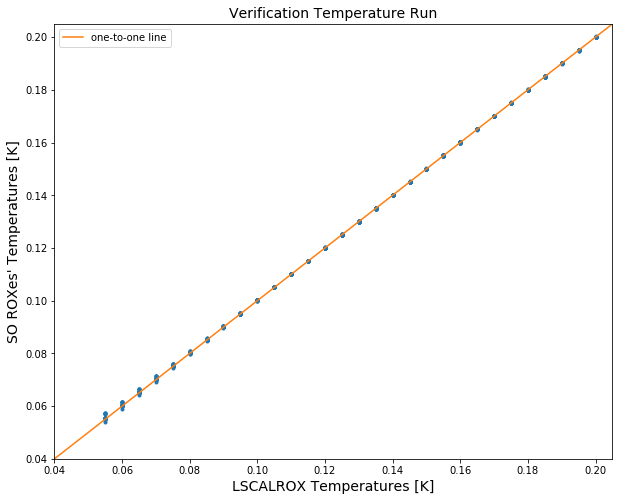

In [24]:
x = np.arange(0,10)
plt.plot(lsrox_trial2, roxestrial_2, '.')
plt.plot(x, label = 'one-to-one line')
plt.ylim(0.04,0.205)
plt.xlim(0.04,0.205) #not the linear fit; just a raw one to one line
plt.xlabel("LSCALROX Temperatures [K]", fontsize = 14)
plt.ylabel("SO ROXes' Temperatures [K]", fontsize = 14)
plt.title("Verification Temperature Run", fontsize = 14)
plt.legend()

## Linear Fit

In [25]:
linfit = np.polyfit(lsrox_trial2, roxestrial_2, 1)

In [26]:
print(linfit)

[9.97225594e-01 4.86122517e-04]


In [27]:
#xp = np.linspace(0,0.2,100) #750?
p = np.poly1d(linfit)
p_eval = p(np.linspace(np.min(lsrox_trial2), np.max(lsrox_trial2), len(lsrox_trial2)))#p(np.linspace(0.055, 0.2, len(lsrox_trial2)))
len(p_eval)

600

In [28]:
print(np.min(lsrox_trial2))
print(np.min(roxestrial_2))

0.05502889111111111
0.05403129347826086


In [29]:
p

poly1d([9.97225594e-01, 4.86122517e-04])

Text(0.5, 1.0, 'Verification Temperature Run')

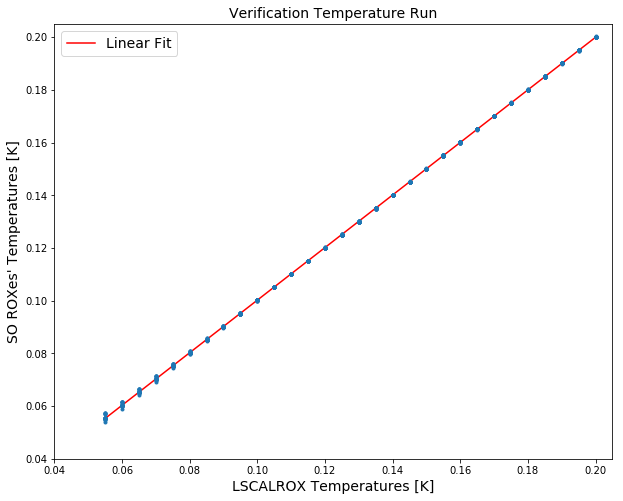

In [30]:
plt.plot(np.linspace(np.min(lsrox_trial2), np.max(lsrox_trial2), len(lsrox_trial2)), p_eval, color = 'r', label = 'Linear Fit')
plt.plot(lsrox_trial2, roxestrial_2, '.')
#plt.plot(x, 'g--', label = 'one-to-one line')
plt.ylim(0.04,0.205)
plt.xlim(0.04,0.205) 
plt.legend(fontsize = 14)
plt.xlabel("LSCALROX Temperatures [K]", fontsize = 14)
plt.ylabel("SO ROXes' Temperatures [K]", fontsize = 14)
plt.title("Verification Temperature Run", fontsize = 14)

In [31]:
roxestrial_2[0:10]

array([0.05403129, 0.05487357, 0.05511534, 0.05515814, 0.05523142,
       0.05524996, 0.05529935, 0.0553045 , 0.05530974, 0.05531877])

In [32]:
print(lsrox_trial2[581:600])
print(p_eval[581:600])
print(roxestrial_2[581:600])

[0.19999402 0.19999402 0.19999402 0.19999402 0.19999402 0.19999402
 0.19999402 0.19999402 0.19999402 0.19999402 0.19999402 0.19999402
 0.19999402 0.19999402 0.19999402 0.19999402 0.19999402 0.19999402
 0.19999402]
[0.19558115 0.19582249 0.19606383 0.19630517 0.19654652 0.19678786
 0.1970292  0.19727054 0.19751188 0.19775322 0.19799456 0.1982359
 0.19847724 0.19871858 0.19895992 0.19920126 0.1994426  0.19968394
 0.19992528]
[0.19998858 0.20001371 0.2000153  0.20001844 0.20002251 0.20002316
 0.2000292  0.20003504 0.20004404 0.20004783 0.20007478 0.20009561
 0.2001113  0.20011202 0.20012628 0.20013298 0.20014372 0.20014542
 0.20022935]


## How do these std's compare with the ones from temperature steps

In [33]:
print('55mk', np.std(roxestrial_2[0:20]-p_eval[0:20])) #55mK
print('60mk', np.std(roxestrial_2[21:40]-p_eval[21:40])) #60mK
print('65mk', np.std(roxestrial_2[41:60]-p_eval[41:60])) #65mK
print('70mk', np.std(roxestrial_2[61:80]-p_eval[61:80])) #70mK
print('75mk', np.std(roxestrial_2[81:100]-p_eval[81:100])) #75mK
print('80mk', np.std(roxestrial_2[101:120]-p_eval[101:120])) # 80mK
print('85mk', np.std(roxestrial_2[121:140]-p_eval[121:140])) # 85mk
print('90mk', np.std(roxestrial_2[141:160]-p_eval[141:160]))
print('95mk',np.std(roxestrial_2[161:180]-p_eval[161:180]))
print('100mk', np.std(roxestrial_2[181:200]-p_eval[181:200]))
print('105mk', np.std(roxestrial_2[201:220]-p_eval[201:220]))
print('110mk', np.std(roxestrial_2[221:240]-p_eval[221:240]))
print('115mk', np.std(roxestrial_2[241:260]-p_eval[241:260]))
print('120mk', np.std(roxestrial_2[261:280]-p_eval[261:280]))
print('125mk', np.std(roxestrial_2[281:300]-p_eval[281:300]))
print('130mk', np.std(roxestrial_2[300:320]-p_eval[300:320]))
print('135mk', np.std(roxestrial_2[320:340]-p_eval[320:340]))
print('140mk', np.std(roxestrial_2[341:360]-p_eval[341:360]))
print('145mk', np.std(roxestrial_2[361:380]-p_eval[361:380]))
print('150mk', np.std(roxestrial_2[381:400]-p_eval[381:400]))
print('155mk', np.std(roxestrial_2[401:420]-p_eval[401:420]))
print('160mk', np.std(roxestrial_2[421:440]-p_eval[421:440]))
print('165mk', np.std(roxestrial_2[441:460]-p_eval[441:460]))
print('170mk', np.std(roxestrial_2[461:480]-p_eval[461:480]))
print('175mk', np.std(roxestrial_2[481:500]-p_eval[481:500]))
print('180mk', np.std(roxestrial_2[501:520]-p_eval[501:520]))
print('185mk', np.std(roxestrial_2[521:540]-p_eval[521:540]))
print('190mk', np.std(roxestrial_2[541:560]-p_eval[541:560]))
print('195mk', np.std(roxestrial_2[561:580]-p_eval[561:580]))
print('200mk', np.std(roxestrial_2[581:600]-p_eval[581:600]))

55mk 0.0007346714670705656
60mk 0.0008622328465254923
65mk 0.000908162088847681
70mk 0.0009243403981269541
75mk 0.0010132399905206874
80mk 0.0010936625659058014
85mk 0.0011359624478254496
90mk 0.0011853338239797633
95mk 0.001210976014849218
100mk 0.0012683486482820176
105mk 0.0012690622276686741
110mk 0.0012859788537281649
115mk 0.001281698038219686
120mk 0.0012063307870616438
125mk 0.0012225508069428055
130mk 0.0012979805733384176
135mk 0.0013136757933532694
140mk 0.0012592884444723887
145mk 0.0012666023447381227
150mk 0.0012579379725158478
155mk 0.0012576212348120118
160mk 0.0012643366887131456
165mk 0.0012559275079157765
170mk 0.0012570883627826025
175mk 0.0012682690557067418
180mk 0.0012791634062501607
185mk 0.00126810124460504
190mk 0.0012660869210031536
195mk 0.0012485139268565621
200mk 0.0012635968655731321


### From temperature steps (taking residuals from integer steps of temperature values, NOT a linear fit like done here), the standard dev's are:

- These residuals include 5 sets of verification data where it's possible that some temperature steps are misaligned. For example, the closest temperature step for 55mK was either 51mk or 60mK. May need to redo this so that the calculations are happening across the same sets of data when comparing std's

[ALL STD's IN KELVIN]

- 55mk: 0.0020937218686399675
- 75mk: 0.00039664688691029907
- 100mk: 7.010182711764236e-05
- 125mk: 0.00011461183007369622
- 150mk: 8.002471540125872e-05
- 175mk: 7.389495448516778e-05
- 200mk: 6.805464594423962e-05

statistical errors: setpoint story above tells us we calibrated at the actual temperature steps we said we did.

### From linear fit of verification data (excluding x001 and a set of ROX data--read above bullet point)

[ALL STD's IN KELVIN]

- 55mk: 0.0009168679421454772 (when i include that 4th set of data, i get 0.0019 for std; similar to that above)
- 75mk: 0.00043589637355573877
- 100mk: 5.61023292386575e-05
- 125mk: 5.610232923865751e-05
- 150mk: 5.610232923865751e-05
- 175mk: 5.6102329238657495e-05
- 200mk: 5.61023292386575e-05

-- Look at the raw residual data points themselves.
statistical errors: plot the above steps to see raw residual steps bc std is so same


### From the argsort linear fit where the residuals look weird, the standard dev's are:

[ALL STD's IN KELVIN]

- 55mk: 0.0007346714670705656
- 75mk: 0.0010132399905206874
- 100mk: 0.0012683486482820176
- 125mk: 0.0012225508069428055
- 150mk: 0.0012579379725158478
- 175mk: 0.0012682690557067418
- 200mk: 0.0012635968655731321

for all the points at 55mk, take the median (will get rid outliers; fit a line to those median points and then find the np.std of the residuals at each step).


### X001 Standard Dev's: 
Standard Deviations of X001 data (not including a 'bad' batch where there is no 55mk, only 51mk or 60mk—the data points for the other steps are good data so not sure i need to make such a clean break). Only 2 batches of x001 data. 

[ALL STD's IN KELVIN]

- 55mk: 0.0015658671336553978
- 75mk: 0.0005964554267310768
- 100mk: 5.982305470878663e-05
- 125mk: 0.00012039202898550538
- 150mk: 7.153706080538502e-05
- 175mk: 7.376247987120332e-05
- 200mk: 3.681803542675277e-05

this is a systematic error

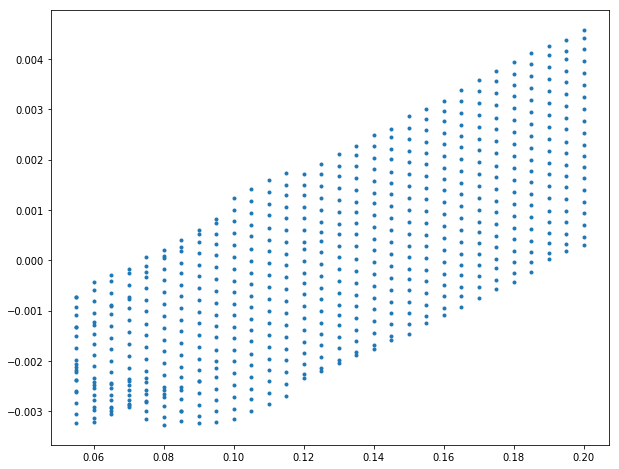

In [34]:
plt.plot(lsrox_trial2, (roxestrial_2-p_eval), '.')
#linear fit - rox verification temps 

In [35]:
print(roxestrial_2[0:10])
print(p_eval[0:10])

[0.05403129 0.05487357 0.05511534 0.05515814 0.05523142 0.05524996
 0.05529935 0.0553045  0.05530974 0.05531877]
[0.05536234 0.05560368 0.05584502 0.05608636 0.0563277  0.05656904
 0.05681038 0.05705172 0.05729306 0.05753441]


In [36]:
p_eval

array([0.05536234, 0.05560368, 0.05584502, 0.05608636, 0.0563277 ,
       0.05656904, 0.05681038, 0.05705172, 0.05729306, 0.05753441,
       0.05777575, 0.05801709, 0.05825843, 0.05849977, 0.05874111,
       0.05898245, 0.05922379, 0.05946513, 0.05970647, 0.05994781,
       0.06018915, 0.06043049, 0.06067183, 0.06091317, 0.06115451,
       0.06139585, 0.06163719, 0.06187853, 0.06211987, 0.06236121,
       0.06260256, 0.0628439 , 0.06308524, 0.06332658, 0.06356792,
       0.06380926, 0.0640506 , 0.06429194, 0.06453328, 0.06477462,
       0.06501596, 0.0652573 , 0.06549864, 0.06573998, 0.06598132,
       0.06622266, 0.066464  , 0.06670534, 0.06694668, 0.06718802,
       0.06742936, 0.06767071, 0.06791205, 0.06815339, 0.06839473,
       0.06863607, 0.06887741, 0.06911875, 0.06936009, 0.06960143,
       0.06984277, 0.07008411, 0.07032545, 0.07056679, 0.07080813,
       0.07104947, 0.07129081, 0.07153215, 0.07177349, 0.07201483,
       0.07225617, 0.07249751, 0.07273885, 0.0729802 , 0.07322

### Trying to get the proper residuals from the below setup since above is on my last nerve

Text(0.5, 1.0, 'Verification Run Residuals from Linear Fit')

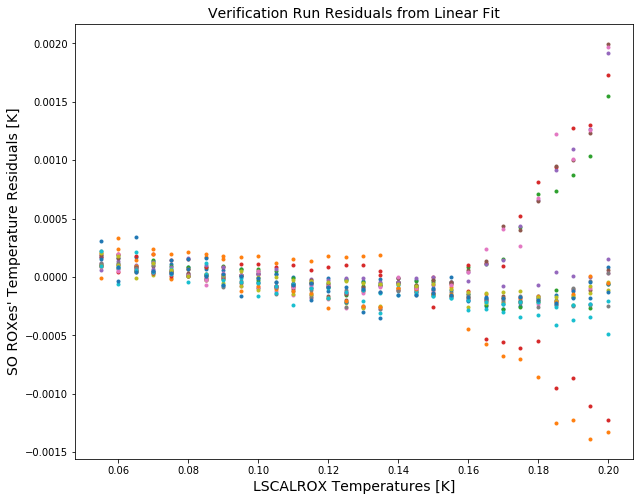

In [37]:
p_eval_2 = p(np.linspace(np.min(lsrox_trial2), np.max(lsrox_trial2), len(lsroxtemps))) #also should be min and max of lsroxtemps
plt.plot(lsroxtemps, (np.sort(x031)-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x032)-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x102)-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x001)-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x111)-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x083[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x075[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x035[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x076[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x029[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x090[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x039[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x050[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x021[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x038[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x092[0:30])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x026[0:30])-p_eval_2), '.')
#plt.plot(lsroxtemps, (np.sort(x057)-p_eval_2), '.')
#plt.plot(lsroxtemps, (np.sort(x044)-p_eval_2), '.')
#plt.plot(lsroxtemps, (np.sort(x113)-p_eval_2), '.')
#plt.plot(lsroxtemps, (np.sort(x097)-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x068[1:])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x071[1:])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x079[1:])-p_eval_2), '.')
plt.plot(lsroxtemps, (np.sort(x064[1:])-p_eval_2), '.')
#linear fit - rox verification temps 
plt.xlabel("LSCALROX Temperatures [K]", fontsize = 14)
plt.ylabel("SO ROXes' Temperature Residuals [K]", fontsize = 14)
plt.title("Verification Run Residuals from Linear Fit", fontsize = 14)

### finding standard deviations for p_eval2 to compare with argsort linear fit

In [38]:
x031=np.sort(x031)
x032=np.sort(x032)
x102=np.sort(x102)
x111=np.sort(x111)
x083=np.sort(x083[0:30])
x075=np.sort(x075[0:30])
x035=np.sort(x035[0:30])
x076=np.sort(x076[0:30])
x029=np.sort(x029[0:30])
x090=np.sort(x090[0:30])
x039=np.sort(x039[0:30])
x050=np.sort(x050[0:30])
x021=np.sort(x021[0:30])
x038=np.sort(x038[0:30])
x092=np.sort(x092[0:30])
x026=np.sort(x026[0:30])

In [39]:
print(x031[4])
print(x032[4])
print(x102[4])
print(x111[4])
print(x083[4])
print(x075[4])
print(x035[4])
print(x076[4])
print(x029[4])
print(x090[4])
print(x039[4])
print(x050[4])
print(x021[4])
print(x038[4])
print(x092[4])
print(x026[4])
print(p_eval_2[4])

0.07512483695652175
0.0744459043478261
0.0750892695652174
0.07523245
0.0751026847826087
0.07506816304347827
0.07512142173913042
0.07510039782608695
0.07497511777777778
0.07514163043478261
0.0751392304347826
0.07601011660516604
0.07611182509225091
0.07596407490774908
0.07595214259259259
0.0759814125925926
0.07530205711132497


In [40]:
roxes_1 = []
for ser, values in all_verify_data[0].items():
    roxes_1.append(ser)

roxes_1.remove('CAL')
roxes_1.remove('X-001')

roxes_2 = []
for ser, values in all_verify_data[1].items():
    roxes_2.append(ser)

roxes_2.remove('CAL')

roxes_3 = []
for ser, values in all_verify_data[2].items():
    roxes_3.append(ser)

roxes_3.remove('CAL')
roxes_3.remove('X-001')

roxes_4 = []
for ser, values in all_verify_data[3].items():
    roxes_4.append(ser)

roxes_4.remove('CAL')
roxes_4.remove('X-001')

roxes_5 = []
for ser, values in all_verify_data[4].items():
    roxes_5.append(ser)

roxes_5.remove('CAL')


In [41]:
resids_55mk = []
for idx, ser in enumerate(roxes_1):
    print('a check: ', all_verify_data[0][ser]['temp_avg'][29])
    print('lin fit value: ', p_eval_2[0])
    resids = all_verify_data[0][ser]['temp_avg'][29]-p_eval_2[0]
    resids_55mk.append(resids)
    
for idx, ser in enumerate(roxes_2):
    print('a check: ', all_verify_data[1][ser]['temp_avg'][29])
    print('lin fit value: ', p_eval_2[0])
    resids = all_verify_data[1][ser]['temp_avg'][29]-p_eval_2[0]
    resids_55mk.append(resids)

for idx, ser in enumerate(roxes_3):
    print('a check: ', all_verify_data[2][ser]['temp_avg'][29])
    print('lin fit value: ', p_eval_2[0])
    resids = all_verify_data[2][ser]['temp_avg'][29]-p_eval_2[0]
    resids_55mk.append(resids)

#for idx, ser in enumerate(roxes_4):
#    print('a check: ', all_verify_data[3][ser]['temp_avg'][28])
#    print('lin fit value: ', p_eval_2[0])
#    resids = all_verify_data[3][ser]['temp_avg'][28]-p_eval_2[0]
#    resids_55mk.append(resids)

#print(roxes_4)

## recall that this batch above has 51mk and 60mk step so ignoring for now

for idx, ser in enumerate(roxes_5):
    print('a check: ', all_verify_data[4][ser]['temp_avg'][-1])
    print('lin fit value: ', p_eval_2[0])
    resids = all_verify_data[4][ser]['temp_avg'][-1]-p_eval_2[0]
    resids_55mk.append(resids)



a check:  0.05544777111111113
lin fit value:  0.05536234116380533
a check:  0.05403129347826086
lin fit value:  0.05536234116380533
a check:  0.05529934782608696
lin fit value:  0.05536234116380533
a check:  0.05551434565217391
lin fit value:  0.05536234116380533
a check:  0.055418886956521723
lin fit value:  0.05536234116380533
a check:  0.055400278260869566
lin fit value:  0.05536234116380533
a check:  0.05539585
lin fit value:  0.05536234116380533
a check:  0.05531877173913043
lin fit value:  0.05536234116380533
a check:  0.05487357173913044
lin fit value:  0.05536234116380533
a check:  0.055304497826086964
lin fit value:  0.05536234116380533
a check:  0.055309743478260856
lin fit value:  0.05536234116380533
a check:  0.05691346111111111
lin fit value:  0.05536234116380533
a check:  0.057095271955719555
lin fit value:  0.05536234116380533
a check:  0.05727776888888889
lin fit value:  0.05536234116380533
a check:  0.05735992103321034
lin fit value:  0.05536234116380533
a check:  0.05

In [42]:
resids_55mk

[8.542994730579428e-05,
 -0.0013310476855444703,
 -6.29933377183714e-05,
 0.00015200448836857894,
 5.654579271639065e-05,
 3.793709706423343e-05,
 3.35088361946706e-05,
 -4.356942467489966e-05,
 -0.0004887694246748925,
 -5.7843337718369026e-05,
 -5.25976855444768e-05,
 0.001551119947305779,
 0.0017329307919142223,
 0.00191542772508356,
 0.0019975798694050056,
 0.001965516769774002,
 -0.00024700420728360206,
 -0.00011238464206619891,
 -0.00020419894158311275,
 -0.00013092338602754827]

In [43]:
np.std(resids_55mk)

0.0009168679421454772

In [44]:
resids_75mk = []
for idx, ser in enumerate(roxes_1):
    print('a check: ', all_verify_data[0][ser]['temp_avg'][25])
    print('lin fit value: ', p_eval_2[4])
    resids = all_verify_data[0][ser]['temp_avg'][25]-p_eval_2[4]
    resids_75mk.append(resids)
    
for idx, ser in enumerate(roxes_2):
    print('a check: ', all_verify_data[1][ser]['temp_avg'][25])
    print('lin fit value: ', p_eval_2[4])
    resids = all_verify_data[1][ser]['temp_avg'][25]-p_eval_2[4]
    resids_75mk.append(resids)
    
for idx, ser in enumerate(roxes_3):
    print('a check: ', all_verify_data[2][ser]['temp_avg'][25])
    print('lin fit value: ', p_eval_2[4])
    resids = all_verify_data[2][ser]['temp_avg'][25]-p_eval_2[4]
    resids_75mk.append(resids)
    
#for idx, ser in enumerate(roxes_4):
#    print('a check: ', all_verify_data[3][ser]['temp_avg'][25])
#    print('lin fit value: ', p_eval_2[4])
#    resids = all_verify_data[3][ser]['temp_avg'][25]-p_eval_2[4]
#    resids_75mk.append(resids)
    
for idx, ser in enumerate(roxes_5):
    print('a check: ', all_verify_data[4][ser]['temp_avg'][26])
    print('lin fit value: ', p_eval_2[4])
    resids = all_verify_data[4][ser]['temp_avg'][26]-p_eval_2[4]
    resids_75mk.append(resids)

a check:  0.07512483695652175
lin fit value:  0.07530205711132497
a check:  0.0744459043478261
lin fit value:  0.07530205711132497
a check:  0.0750892695652174
lin fit value:  0.07530205711132497
a check:  0.07523245
lin fit value:  0.07530205711132497
a check:  0.0751026847826087
lin fit value:  0.07530205711132497
a check:  0.07506816304347827
lin fit value:  0.07530205711132497
a check:  0.07512142173913042
lin fit value:  0.07530205711132497
a check:  0.07510039782608695
lin fit value:  0.07530205711132497
a check:  0.07497511777777778
lin fit value:  0.07530205711132497
a check:  0.07514163043478261
lin fit value:  0.07530205711132497
a check:  0.0751392304347826
lin fit value:  0.07530205711132497
a check:  0.07601011660516604
lin fit value:  0.07530205711132497
a check:  0.07611182509225091
lin fit value:  0.07530205711132497
a check:  0.07596407490774908
lin fit value:  0.07530205711132497
a check:  0.07595214259259259
lin fit value:  0.07530205711132497
a check:  0.07598141259

In [45]:
resids_75mk

[-0.00017722015480321762,
 -0.0008561527634988741,
 -0.0002127875461075679,
 -6.960711132496245e-05,
 -0.00019937232871626576,
 -0.00023389406784669886,
 -0.0001806353721945514,
 -0.00020165928523802057,
 -0.0003269393335471882,
 -0.0001604266765423551,
 -0.0001628266765423686,
 0.0007080594938410761,
 0.0008097679809259406,
 0.0006620177964241081,
 0.0006500854812676177,
 0.0006793554812676295,
 -0.0002575282224360903,
 -0.00016741711132496617,
 -0.0002179126668805237,
 -0.00019490928523802076]

In [46]:
np.std(resids_75mk)

0.00043589637355573877

In [47]:
print(p_eval_2[9])

0.10022670204572452


In [61]:
resids_100mk = []
for idx, ser in enumerate(roxes_1):
    print('a check: ', all_verify_data[0][ser]['temp_avg'][20])
    print('lin fit value: ', p_eval_2[9])
    resids = all_verify_data[0][ser]['temp_avg'][20]-p_eval_2[9]
    resids_100mk.append(resids)
    
for idx, ser in enumerate(roxes_2):
    print('a check: ', all_verify_data[1][ser]['temp_avg'][20])
    print('lin fit value: ', p_eval_2[9])
    resids = all_verify_data[1][ser]['temp_avg'][20]-p_eval_2[9]
    resids_100mk.append(resids)
    
for idx, ser in enumerate(roxes_3):
    print('a check: ', all_verify_data[2][ser]['temp_avg'][20])
    print('lin fit value: ', p_eval_2[9])
    resids = all_verify_data[2][ser]['temp_avg'][20]-p_eval_2[9]
    resids_100mk.append(resids)
    
#for idx, ser in enumerate(roxes_4):
#    print('a check: ', all_verify_data[3][ser]['temp_avg'][25])
#    print('lin fit value: ', p_eval_2[4])
#    resids = all_verify_data[3][ser]['temp_avg'][25]-p_eval_2[4]
#    resids_75mk.append(resids)
    
for idx, ser in enumerate(roxes_5):
    print('a check: ', all_verify_data[4][ser]['temp_avg'][21])
    print('lin fit value: ', p_eval_2[9])
    resids = all_verify_data[4][ser]['temp_avg'][21]-p_eval_2[9]
    resids_100mk.append(resids)

a check:  0.10022925434782609
lin fit value:  0.10022670204572452
a check:  0.10013810652173913
lin fit value:  0.10022670204572452
a check:  0.10017904347826084
lin fit value:  0.10022670204572452
a check:  0.10018133260869568
lin fit value:  0.10022670204572452
a check:  0.1000657891304348
lin fit value:  0.10022670204572452
a check:  0.10006530652173914
lin fit value:  0.10022670204572452
a check:  0.1000942956521739
lin fit value:  0.10022670204572452
a check:  0.10007204130434783
lin fit value:  0.10022670204572452
a check:  0.10004542826086958
lin fit value:  0.10022670204572452
a check:  0.10011078222222218
lin fit value:  0.10022670204572452
a check:  0.10008144888888891
lin fit value:  0.10022670204572452
a check:  0.10018632222222221
lin fit value:  0.10022670204572452
a check:  0.10016450553505535
lin fit value:  0.10022670204572452
a check:  0.10018552222222223
lin fit value:  0.10022670204572452
a check:  0.10018753703703703
lin fit value:  0.10022670204572452
a check:  0.

In [62]:
resids_100mk

[2.5523021015688707e-06,
 -8.859552398539361e-05,
 -4.765856746367925e-05,
 -4.5369437028847104e-05,
 -0.00016091291528971818,
 -0.0001613955239853776,
 -0.00013240639355062422,
 -0.00015466074137669705,
 -0.0001812737848549406,
 -0.00011591982350234176,
 -0.0001452531568356119,
 -4.037982350231506e-05,
 -6.219651066917409e-05,
 -4.117982350229643e-05,
 -3.9165008687488956e-05,
 -6.551016380570984e-05,
 -0.00016582161094193248,
 -0.00010478900224625276,
 -0.00017712161094193823,
 -0.00015328649016896345]

In [63]:
np.std(resids_100mk)

5.61023292386575e-05

In [56]:
print(p_eval_2[14])

0.12515134698012406


In [64]:
resids_125mk = []
for idx, ser in enumerate(roxes_1):
    print('a check: ', all_verify_data[0][ser]['temp_avg'][15])
    print('lin fit value: ', p_eval_2[14])
    resids = all_verify_data[0][ser]['temp_avg'][20]-p_eval_2[14]
    resids_125mk.append(resids)
    
for idx, ser in enumerate(roxes_2):
    print('a check: ', all_verify_data[1][ser]['temp_avg'][15])
    print('lin fit value: ', p_eval_2[14])
    resids = all_verify_data[1][ser]['temp_avg'][20]-p_eval_2[14]
    resids_125mk.append(resids)
    
for idx, ser in enumerate(roxes_3):
    print('a check: ', all_verify_data[2][ser]['temp_avg'][15])
    print('lin fit value: ', p_eval_2[14])
    resids = all_verify_data[2][ser]['temp_avg'][20]-p_eval_2[14]
    resids_125mk.append(resids)
    
#for idx, ser in enumerate(roxes_4):
#    print('a check: ', all_verify_data[3][ser]['temp_avg'][25])
#    print('lin fit value: ', p_eval_2[4])
#    resids = all_verify_data[3][ser]['temp_avg'][25]-p_eval_2[4]
#    resids_75mk.append(resids)
    
for idx, ser in enumerate(roxes_5):
    print('a check: ', all_verify_data[4][ser]['temp_avg'][16])
    print('lin fit value: ', p_eval_2[14])
    resids = all_verify_data[4][ser]['temp_avg'][21]-p_eval_2[14]
    resids_125mk.append(resids)

a check:  0.12511362222222222
lin fit value:  0.12515134698012406
a check:  0.12533171739130436
lin fit value:  0.12515134698012406
a check:  0.12511084782608695
lin fit value:  0.12515134698012406
a check:  0.1251398043478261
lin fit value:  0.12515134698012406
a check:  0.12489630434782607
lin fit value:  0.12515134698012406
a check:  0.12489560869565214
lin fit value:  0.12515134698012406
a check:  0.12490328888888894
lin fit value:  0.12515134698012406
a check:  0.12488423913043478
lin fit value:  0.12515134698012406
a check:  0.12494865217391304
lin fit value:  0.12515134698012406
a check:  0.12485047826086956
lin fit value:  0.12515134698012406
a check:  0.12490613043478262
lin fit value:  0.12515134698012406
a check:  0.12506987822878232
lin fit value:  0.12515134698012406
a check:  0.1250308703703704
lin fit value:  0.12515134698012406
a check:  0.1250585185185185
lin fit value:  0.12515134698012406
a check:  0.12506158518518518
lin fit value:  0.12515134698012406
a check:  0.1

In [65]:
resids_125mk

[-0.02492209263229797,
 -0.025013240458384933,
 -0.02497230350186322,
 -0.024970014371428387,
 -0.025085557849689258,
 -0.025086040458384917,
 -0.025057051327950164,
 -0.025079305675776237,
 -0.02510591871925448,
 -0.02504056475790188,
 -0.02506989809123515,
 -0.024965024757901855,
 -0.024986841445068714,
 -0.024965824757901836,
 -0.02496380994308703,
 -0.02499015509820525,
 -0.025090466545341472,
 -0.025029433936645792,
 -0.025101766545341478,
 -0.025077931424568503]

In [66]:
np.std(resids_125mk)

5.610232923865751e-05

In [67]:
print(p_eval_2[19])

0.15007599191452362


In [68]:
resids_150mk = []
for idx, ser in enumerate(roxes_1):
    print('a check: ', all_verify_data[0][ser]['temp_avg'][10])
    print('lin fit value: ', p_eval_2[19])
    resids = all_verify_data[0][ser]['temp_avg'][20]-p_eval_2[19]
    resids_150mk.append(resids)
    
for idx, ser in enumerate(roxes_2):
    print('a check: ', all_verify_data[1][ser]['temp_avg'][10])
    print('lin fit value: ', p_eval_2[19])
    resids = all_verify_data[1][ser]['temp_avg'][20]-p_eval_2[19]
    resids_150mk.append(resids)
    
for idx, ser in enumerate(roxes_3):
    print('a check: ', all_verify_data[2][ser]['temp_avg'][10])
    print('lin fit value: ', p_eval_2[19])
    resids = all_verify_data[2][ser]['temp_avg'][20]-p_eval_2[19]
    resids_150mk.append(resids)
    
#for idx, ser in enumerate(roxes_4):
#    print('a check: ', all_verify_data[3][ser]['temp_avg'][25])
#    print('lin fit value: ', p_eval_2[4])
#    resids = all_verify_data[3][ser]['temp_avg'][25]-p_eval_2[4]
#    resids_75mk.append(resids)
    
for idx, ser in enumerate(roxes_5):
    print('a check: ', all_verify_data[4][ser]['temp_avg'][11])
    print('lin fit value: ', p_eval_2[19])
    resids = all_verify_data[4][ser]['temp_avg'][21]-p_eval_2[19]
    resids_150mk.append(resids)

a check:  0.15010060869565214
lin fit value:  0.15007599191452362
a check:  0.15019858695652172
lin fit value:  0.15007599191452362
a check:  0.15012534782608697
lin fit value:  0.15007599191452362
a check:  0.1501411086956522
lin fit value:  0.15007599191452362
a check:  0.14999860869565218
lin fit value:  0.15007599191452362
a check:  0.14995267391304348
lin fit value:  0.15007599191452362
a check:  0.14993315555555556
lin fit value:  0.15007599191452362
a check:  0.14998271739130434
lin fit value:  0.15007599191452362
a check:  0.14993877777777778
lin fit value:  0.15007599191452362
a check:  0.15010321739130433
lin fit value:  0.15007599191452362
a check:  0.1499746956521739
lin fit value:  0.15007599191452362
a check:  0.14999191481481483
lin fit value:  0.15007599191452362
a check:  0.14999725185185186
lin fit value:  0.15007599191452362
a check:  0.14999316236162363
lin fit value:  0.15007599191452362
a check:  0.14999719259259262
lin fit value:  0.15007599191452362
a check:  0.

In [70]:
print(resids_150mk)
print(np.std(resids_150mk))

[-0.049846737566697524, -0.04993788539278449, -0.04989694843626277, -0.04989465930582794, -0.05001020278408881, -0.05001068539278447, -0.04998169626234972, -0.05000395061017579, -0.050030563653654034, -0.049965209692301435, -0.049994543025634705, -0.04988966969230141, -0.04991148637946827, -0.04989046969230139, -0.04988845487748658, -0.0499148000326048, -0.050015111479741026, -0.049954078871045346, -0.05002641147974103, -0.05000257635896806]
5.610232923865751e-05


In [71]:
print(p_eval_2[24])

0.17500063684892317


In [72]:
resids_175mk = []
for idx, ser in enumerate(roxes_1):
    print('a check: ', all_verify_data[0][ser]['temp_avg'][5])
    print('lin fit value: ', p_eval_2[24])
    resids = all_verify_data[0][ser]['temp_avg'][20]-p_eval_2[24]
    resids_175mk.append(resids)
    
for idx, ser in enumerate(roxes_2):
    print('a check: ', all_verify_data[1][ser]['temp_avg'][5])
    print('lin fit value: ', p_eval_2[24])
    resids = all_verify_data[1][ser]['temp_avg'][20]-p_eval_2[24]
    resids_175mk.append(resids)
    
for idx, ser in enumerate(roxes_3):
    print('a check: ', all_verify_data[2][ser]['temp_avg'][5])
    print('lin fit value: ', p_eval_2[24])
    resids = all_verify_data[2][ser]['temp_avg'][20]-p_eval_2[24]
    resids_175mk.append(resids)
    
#for idx, ser in enumerate(roxes_4):
#    print('a check: ', all_verify_data[3][ser]['temp_avg'][25])
#    print('lin fit value: ', p_eval_2[4])
#    resids = all_verify_data[3][ser]['temp_avg'][25]-p_eval_2[4]
#    resids_75mk.append(resids)
    
for idx, ser in enumerate(roxes_5):
    print('a check: ', all_verify_data[4][ser]['temp_avg'][6])
    print('lin fit value: ', p_eval_2[24])
    resids = all_verify_data[4][ser]['temp_avg'][21]-p_eval_2[24]
    resids_175mk.append(resids)

a check:  0.1750874888888889
lin fit value:  0.17500063684892317
a check:  0.1752173043478261
lin fit value:  0.17500063684892317
a check:  0.17508828260869566
lin fit value:  0.17500063684892317
a check:  0.17516360869565215
lin fit value:  0.17500063684892317
a check:  0.17506906521739127
lin fit value:  0.17500063684892317
a check:  0.17500997826086956
lin fit value:  0.17500063684892317
a check:  0.17502821739130434
lin fit value:  0.17500063684892317
a check:  0.17501552173913046
lin fit value:  0.17500063684892317
a check:  0.17501802173913045
lin fit value:  0.17500063684892317
a check:  0.1751548913043478
lin fit value:  0.17500063684892317
a check:  0.17507171739130437
lin fit value:  0.17500063684892317
a check:  0.1750047888888889
lin fit value:  0.17500063684892317
a check:  0.17500477407407408
lin fit value:  0.17500063684892317
a check:  0.17502260885608853
lin fit value:  0.17500063684892317
a check:  0.17503439852398525
lin fit value:  0.17500063684892317
a check:  0.17

In [73]:
print(resids_175mk)
print(np.std(resids_175mk))

[-0.07477138250109708, -0.07486253032718404, -0.07482159337066233, -0.0748193042402275, -0.07493484771848836, -0.07493533032718402, -0.07490634119674927, -0.07492859554457534, -0.07495520858805359, -0.07488985462670099, -0.07491918796003426, -0.07481431462670096, -0.07483613131386782, -0.07481511462670094, -0.07481309981188614, -0.07483944496700436, -0.07493975641414058, -0.0748787238054449, -0.07495105641414058, -0.07492722129336761]
5.6102329238657495e-05


In [76]:
print(p_eval_2[29])

0.1999252817833227


In [78]:
resids_200mk = []
for idx, ser in enumerate(roxes_1):
    print('a check: ', all_verify_data[0][ser]['temp_avg'][0])
    print('lin fit value: ', p_eval_2[29])
    resids = all_verify_data[0][ser]['temp_avg'][20]-p_eval_2[29]
    resids_200mk.append(resids)
    
for idx, ser in enumerate(roxes_2):
    print('a check: ', all_verify_data[1][ser]['temp_avg'][0])
    print('lin fit value: ', p_eval_2[29])
    resids = all_verify_data[1][ser]['temp_avg'][20]-p_eval_2[29]
    resids_200mk.append(resids)
    
for idx, ser in enumerate(roxes_3):
    print('a check: ', all_verify_data[2][ser]['temp_avg'][0])
    print('lin fit value: ', p_eval_2[29])
    resids = all_verify_data[2][ser]['temp_avg'][20]-p_eval_2[29]
    resids_200mk.append(resids)
    
#for idx, ser in enumerate(roxes_4):
#    print('a check: ', all_verify_data[3][ser]['temp_avg'][25])
#    print('lin fit value: ', p_eval_2[4])
#    resids = all_verify_data[3][ser]['temp_avg'][25]-p_eval_2[4]
#    resids_75mk.append(resids)
    
for idx, ser in enumerate(roxes_5):
    print('a check: ', all_verify_data[4][ser]['temp_avg'][1])
    print('lin fit value: ', p_eval_2[29])
    resids = all_verify_data[4][ser]['temp_avg'][21]-p_eval_2[29]
    resids_200mk.append(resids)

a check:  0.20009560869565216
lin fit value:  0.1999252817833227
a check:  0.2001262826086957
lin fit value:  0.1999252817833227
a check:  0.20003504444444442
lin fit value:  0.1999252817833227
a check:  0.2001120238095238
lin fit value:  0.1999252817833227
a check:  0.20011130434782612
lin fit value:  0.1999252817833227
a check:  0.20004404347826088
lin fit value:  0.1999252817833227
a check:  0.20014542222222223
lin fit value:  0.1999252817833227
a check:  0.20013297826086954
lin fit value:  0.1999252817833227
a check:  0.20014371739130432
lin fit value:  0.1999252817833227
a check:  0.20022934782608695
lin fit value:  0.1999252817833227
a check:  0.1999189130434782
lin fit value:  0.1999252817833227
a check:  0.20001843542435424
lin fit value:  0.1999252817833227
a check:  0.20002316296296296
lin fit value:  0.1999252817833227
a check:  0.19998857564575648
lin fit value:  0.1999252817833227
a check:  0.2000292
lin fit value:  0.1999252817833227
a check:  0.2000137148148148
lin fit v

In [79]:
print(resids_200mk)
print(np.std(resids_200mk))

[-0.0996960274354966, -0.09978717526158357, -0.09974623830506185, -0.09974394917462702, -0.09985949265288789, -0.09985997526158355, -0.0998309861311488, -0.09985324047897487, -0.09987985352245311, -0.09981449956110051, -0.09984383289443378, -0.09973895956110049, -0.09976077624826735, -0.09973975956110047, -0.09973774474628566, -0.09976408990140388, -0.0998644013485401, -0.09980336873984443, -0.09987570134854011, -0.09985186622776714]
5.61023292386575e-05


In [ ]:
### i think i can plot the standard deviation of each set of residuals using the linear fit though??

In [ ]:
### and then compare with the hardcoded way and see if the answers are the same?

In [ ]:
### also have an explanation for why some things are hard coded?

### Problems

[]

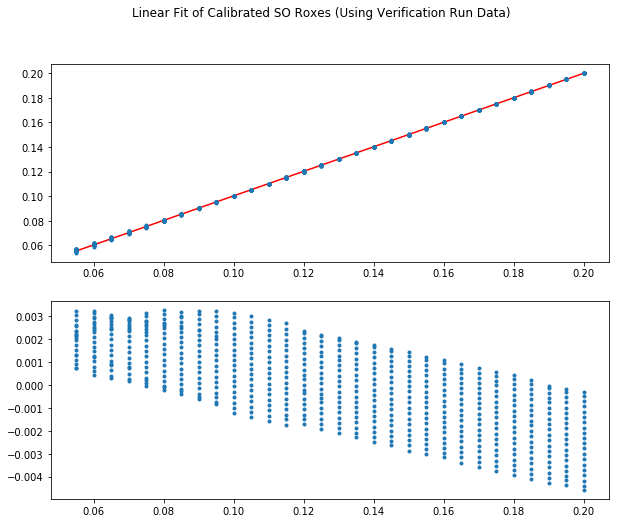

In [86]:
fig, axs = plt.subplots(2)
fig.suptitle("Linear Fit of Calibrated SO Roxes (Using Verification Run Data)")
axs[0].plot(np.linspace(0.055, 0.2, len(lsrox_trial2)), p_eval, color = 'r', label = 'linear fit')
axs[0].plot(lsrox_trial2, roxestrial_2, '.')
axs[1].plot(lsrox_trial2, (p_eval-roxestrial_2), '.')
axs[1].plot(ylabel = 'residuals')


peval should have min and max of lsroxtemps btw in its linspace


and roxestrial2 shows a couple of temperatures below 55 mk and i'm not sure they should be there so that'll throw those things off too